In [31]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt


In [32]:
# Define the paths to your trajectory and topology files
trajectory_file_path = 'Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc'  # Update this path as needed
topology_file_path = 'Data/1hz3_T310.start.nowater.gro'  # Update this path as needed

# Load the trajectory
traj = md.load(trajectory_file_path, top=topology_file_path)

# Print basic information
print(f"Number of frames: {traj.n_frames}")
print(f"Number of atoms: {traj.n_atoms}")
print(f"Number of residues: {traj.n_residues}")

print(f"Trajectory timestep: {traj.timestep} ps")
print(f"Trajectory duration: {traj.n_frames * traj.timestep} ps")


Number of frames: 17
Number of atoms: 408
Number of residues: 26
Trajectory timestep: 1000.0 ps
Trajectory duration: 17000.0 ps


In [33]:
def compute_end_to_end_distance(traj):
    """
    Compute the end-to-end distance for each frame in the trajectory.
    
    Parameters:
    traj : mdtraj.Trajectory
        The trajectory object to analyze.

    Returns:
    np.ndarray
        Array of end-to-end distances for each frame.
    """
    # Assuming the end-to-end distance is between the first and last residues
    first_residue_index = traj.topology.residue(0).atom(0).index
    last_residue_index = traj.topology.residue(-1).atom(0).index

    distances = []

    for frame in traj:
        first_pos = frame.xyz[0][first_residue_index]
        last_pos = frame.xyz[0][last_residue_index]
        distance = np.linalg.norm(first_pos - last_pos)
        distances.append(distance)
    
    return np.array(distances)

# Compute end-to-end distances
end_to_end_distances = compute_end_to_end_distance(traj)

# Print basic information about distances
print(f"Computed {len(end_to_end_distances)} end-to-end distances.")


Computed 17 end-to-end distances.


In [34]:
def compute_radius_of_gyration(traj):
    """
    Compute the radius of gyration for each frame in the trajectory.
    
    Parameters:
    traj : mdtraj.Trajectory
        The trajectory object to analyze.

    Returns:
    np.ndarray
        Array of radii of gyration for each frame.
    """
    rgyrations = []

    for frame in traj:
        rgyration = md.compute_rg(frame)
        rgyrations.append(rgyration[0])  # rgyration is returned as an array with shape (1, )

    return np.array(rgyrations)

# Compute radius of gyration
radius_of_gyration = compute_radius_of_gyration(traj)

# Print basic information about radii of gyration
print(f"Computed {len(radius_of_gyration)} radii of gyration.")


Computed 17 radii of gyration.


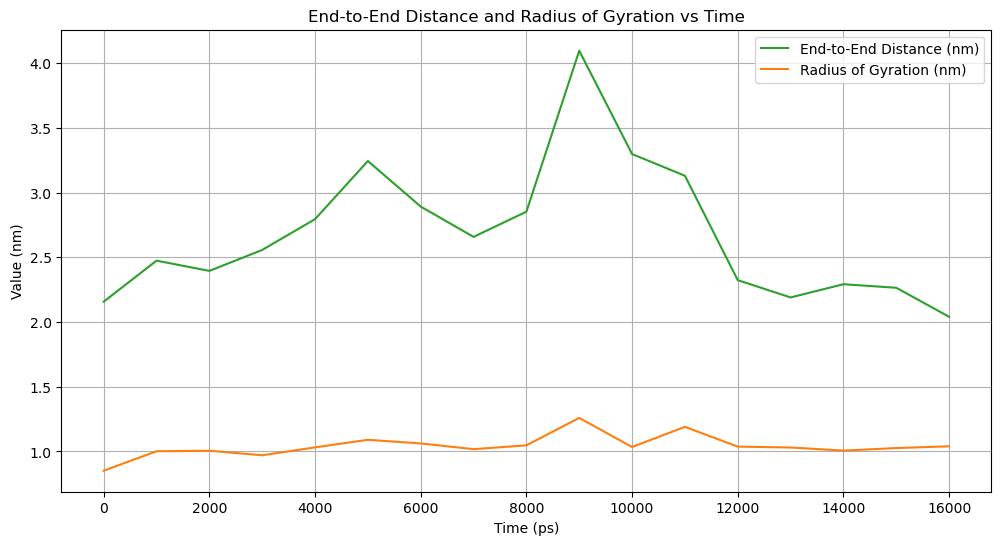

In [35]:
# Create a time array
time = np.arange(traj.n_frames) * traj.timestep  # Time in picoseconds

# Plot both quantities on the same y-axis
plt.figure(figsize=(12, 6))

# Plot End-to-End Distance
plt.plot(time, end_to_end_distances, color='tab:green', label='End-to-End Distance (nm)')

# Plot Radius of Gyration
plt.plot(time, radius_of_gyration, color='tab:orange', label='Radius of Gyration (nm)')

# Add labels and title
plt.xlabel('Time (ps)')
plt.ylabel('Value (nm)')
plt.title('End-to-End Distance and Radius of Gyration vs Time')
plt.legend()
plt.grid(True)

plt.show()


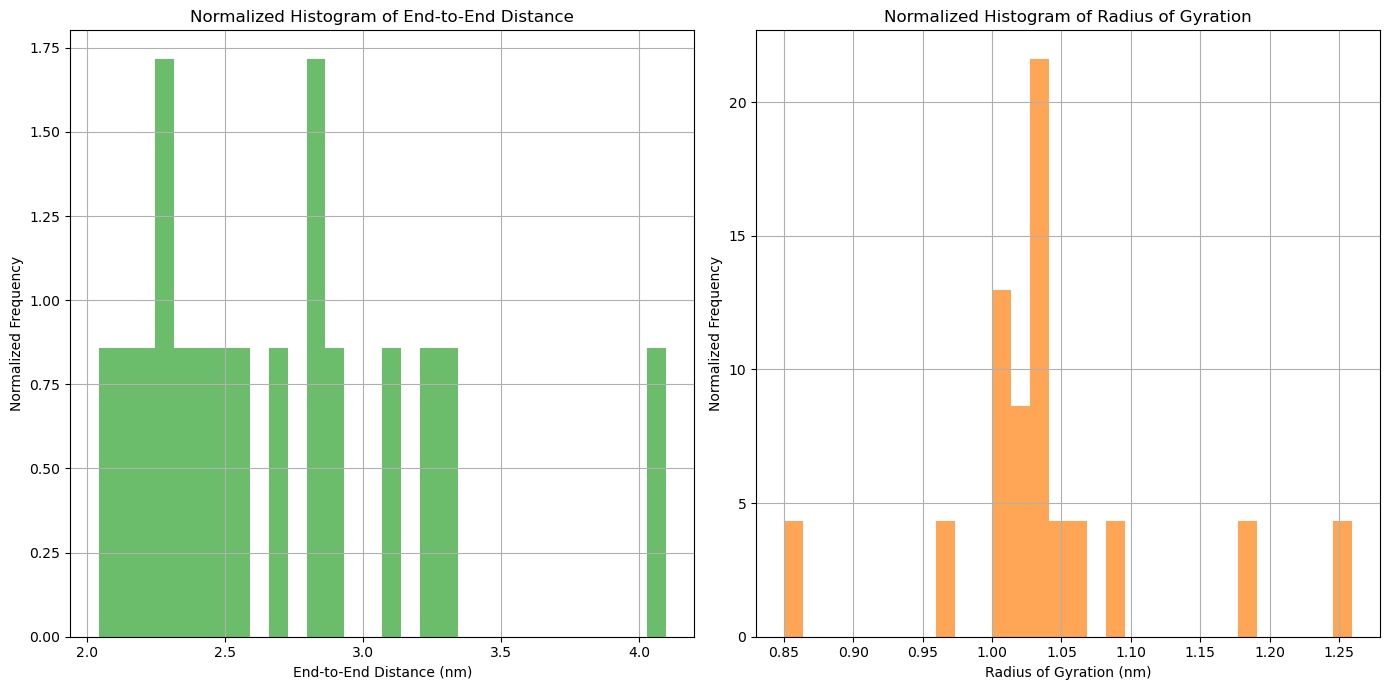

In [36]:
# Plot normalized histogram for end-to-end distances
plt.figure(figsize=(14, 7))

# Plot End-to-End Distance Histogram
plt.subplot(1, 2, 1)
plt.hist(end_to_end_distances, bins=30, density=True, color='tab:green', alpha=0.7)
plt.xlabel('End-to-End Distance (nm)')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Histogram of End-to-End Distance')
plt.grid(True)

# Plot Radius of Gyration Histogram
plt.subplot(1, 2, 2)
plt.hist(radius_of_gyration, bins=30, density=True, color='tab:orange', alpha=0.7)
plt.xlabel('Radius of Gyration (nm)')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Histogram of Radius of Gyration')
plt.grid(True)

plt.tight_layout()
plt.show()
